# Principe

Le tri à bulles consiste à comparer répétitivement les éléments consécutifs d'un tableau. Si une paire d'éléments consécutifs est mal ordonnée, on en permute les éléments. 

Il doit son nom au fait qu'il déplace rapidement les plus grands éléments en fin de tableau, comme des bulles d'air qui remonteraient rapidement à la surface d'un liquide.

Ce tri est mis en oeuvre avec deux boucles imbriquées. 

* La boucle interne itère par indice croissant sur les k-1 paires d'éléments consécutifs pour k éléments. La longueur de cette boucle interne va diminuer à chaque itération de la boucle externe. 


* La boucle externe s'effectue autant de fois que nécessaire pour que le tableau soit trié. Dans le pire des cas, l'élément minimum commence à droite, et ne recule que d'un indice par boucle interne. Il faut alors que la boucle externe s'effectue N-1 fois elle aussi.  

Illustrons le sur le tableau suivant

In [1]:
TAB = [ 5, 8, 4, 3, 2, 6, 7, 1 ]
print(TAB)

[5, 8, 4, 3, 2, 6, 7, 1]


# Mise en oeuvre

Le coeur de l'algorithme consiste à échanger deux éléments consécutifs si le second est strictement plus grand que le premier

In [2]:
def echangeSiNecessaire( A, i, verbose = True):        
    # Après cette fonction, A[i] <= A[i+1]
    
    if verbose: print(A, end = " => ")

    if A[i] > A[i+1]:
        A[i], A[i+1] = A[i+1], A[i]    # swap 
        if verbose: print(A)
    else:
        if verbose: print("Inchangé")
        
    return;

Appliquons le par exemple aux troisièmes et quatrièmes éléments (d'indices 2 et 3)

In [3]:
T = TAB.copy()
echangeSiNecessaire(T,2);

[5, 8, 4, 3, 2, 6, 7, 1] => [5, 8, 3, 4, 2, 6, 7, 1]


In [4]:
echangeSiNecessaire(T,2);

[5, 8, 3, 4, 2, 6, 7, 1] => Inchangé


## Boucle interne

La boucle interne du tri à bulles passe sur toutes les paires d'éléments et teste s'il est nécessaire de les échanger

In [5]:
def boucleInterne(A):
    N = len(A)
    for i in range(0,N-1):  
        echangeSiNecessaire(A,i) 
    return;

In [6]:
T = TAB.copy()
boucleInterne(T)

[5, 8, 4, 3, 2, 6, 7, 1] => Inchangé
[5, 8, 4, 3, 2, 6, 7, 1] => [5, 4, 8, 3, 2, 6, 7, 1]
[5, 4, 8, 3, 2, 6, 7, 1] => [5, 4, 3, 8, 2, 6, 7, 1]
[5, 4, 3, 8, 2, 6, 7, 1] => [5, 4, 3, 2, 8, 6, 7, 1]
[5, 4, 3, 2, 8, 6, 7, 1] => [5, 4, 3, 2, 6, 8, 7, 1]
[5, 4, 3, 2, 6, 8, 7, 1] => [5, 4, 3, 2, 6, 7, 8, 1]
[5, 4, 3, 2, 6, 7, 8, 1] => [5, 4, 3, 2, 6, 7, 1, 8]


Notons qu'à la fin de cette boucle, le plus grand élément du tableau est à sa place finale, tout à droite. Un nouvel appel à cette boucle effectue donc un test inutile entre les deux élément de la dernière paire.

In [7]:
boucleInterne(T)

[5, 4, 3, 2, 6, 7, 1, 8] => [4, 5, 3, 2, 6, 7, 1, 8]
[4, 5, 3, 2, 6, 7, 1, 8] => [4, 3, 5, 2, 6, 7, 1, 8]
[4, 3, 5, 2, 6, 7, 1, 8] => [4, 3, 2, 5, 6, 7, 1, 8]
[4, 3, 2, 5, 6, 7, 1, 8] => Inchangé
[4, 3, 2, 5, 6, 7, 1, 8] => Inchangé
[4, 3, 2, 5, 6, 7, 1, 8] => [4, 3, 2, 5, 6, 1, 7, 8]
[4, 3, 2, 5, 6, 1, 7, 8] => Inchangé


De même, après ce second passage les deux éléments les plus grands sont maintenant en place. Il est donc plus pertinent de limiter l'effet de la boucle interne aux k premier éléments de tableau (k-1 paires)

In [8]:
def boucleInterne2(A,k):
    for i in range(0,k-1):           # paires (0,1), (1,2), ... (k-2,k-1)
        echangeSiNecessaire(A,i) 
    return;

## Boucle externe

Le tri complet consiste à appeler autant de fois que nécessaire cette boucle interne. Le premier appel lui demande de passer sur les N éléments du tableau, puis N-1, N-2, ... jusqu'au dernier appel qui demande d'en traiter 2. Il est en effet inutile de trier un tableau d'un seul élément. 

In [9]:
T = TAB.copy()

N = len(T)
for k in range(N,1,-1):     # N, N-1, ... 3, 2 
    boucleInterne2(T,k)
    print("")

[5, 8, 4, 3, 2, 6, 7, 1] => Inchangé
[5, 8, 4, 3, 2, 6, 7, 1] => [5, 4, 8, 3, 2, 6, 7, 1]
[5, 4, 8, 3, 2, 6, 7, 1] => [5, 4, 3, 8, 2, 6, 7, 1]
[5, 4, 3, 8, 2, 6, 7, 1] => [5, 4, 3, 2, 8, 6, 7, 1]
[5, 4, 3, 2, 8, 6, 7, 1] => [5, 4, 3, 2, 6, 8, 7, 1]
[5, 4, 3, 2, 6, 8, 7, 1] => [5, 4, 3, 2, 6, 7, 8, 1]
[5, 4, 3, 2, 6, 7, 8, 1] => [5, 4, 3, 2, 6, 7, 1, 8]

[5, 4, 3, 2, 6, 7, 1, 8] => [4, 5, 3, 2, 6, 7, 1, 8]
[4, 5, 3, 2, 6, 7, 1, 8] => [4, 3, 5, 2, 6, 7, 1, 8]
[4, 3, 5, 2, 6, 7, 1, 8] => [4, 3, 2, 5, 6, 7, 1, 8]
[4, 3, 2, 5, 6, 7, 1, 8] => Inchangé
[4, 3, 2, 5, 6, 7, 1, 8] => Inchangé
[4, 3, 2, 5, 6, 7, 1, 8] => [4, 3, 2, 5, 6, 1, 7, 8]

[4, 3, 2, 5, 6, 1, 7, 8] => [3, 4, 2, 5, 6, 1, 7, 8]
[3, 4, 2, 5, 6, 1, 7, 8] => [3, 2, 4, 5, 6, 1, 7, 8]
[3, 2, 4, 5, 6, 1, 7, 8] => Inchangé
[3, 2, 4, 5, 6, 1, 7, 8] => Inchangé
[3, 2, 4, 5, 6, 1, 7, 8] => [3, 2, 4, 5, 1, 6, 7, 8]

[3, 2, 4, 5, 1, 6, 7, 8] => [2, 3, 4, 5, 1, 6, 7, 8]
[2, 3, 4, 5, 1, 6, 7, 8] => Inchangé
[2, 3, 4, 5, 1, 6, 7, 8] => Incha

## En résumé

Le tri à bulles effectue deux boucles imbriquées. La boucle extene s'effectue N-1 fois, la boucle interne de N-1 à 1 fois. 

In [10]:
T = TAB.copy()
print("A trier: ",T)

N = len(T)
for k in range(N,1,-1):                 # N, N-1, ... 2
    for i in range(0,k-1):              # paires (0,1), (1,2), ... (k-1,k)
        if T[i] > T[i+1]:
            T[i],T[i+1] = T[i+1],T[i]   # swap
            
print("Trié: ",T)

A trier:  [5, 8, 4, 3, 2, 6, 7, 1]
Trié:  [1, 2, 3, 4, 5, 6, 7, 8]


# Visualisation

Visualisons le tri étape par étape en appelant la fonction affiche ci-dessus à la fin de chaque itération de la boucle externe. 

In [11]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

def affiche(T,it):
    plt.stem(T,markerfmt=',',linefmt='black',basefmt='black')
    plt.title('Iteration {0}'.format(it))
    plt.show()

Pour cette visualisation, trions 20 entiers entre 0 et 100 par ordre croissant

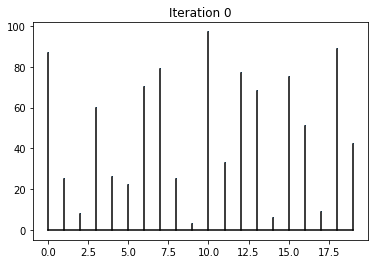

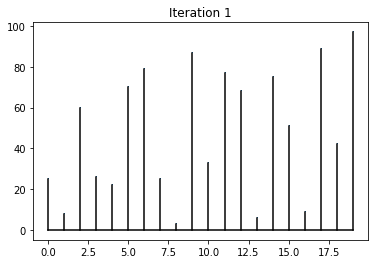

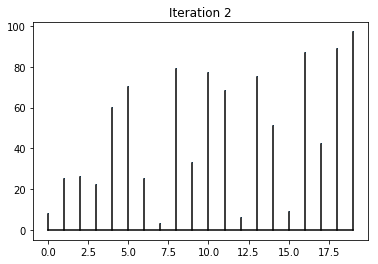

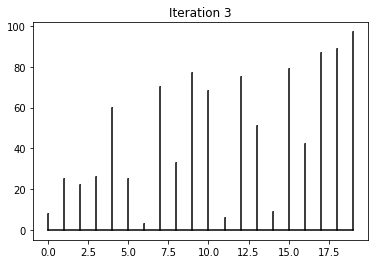

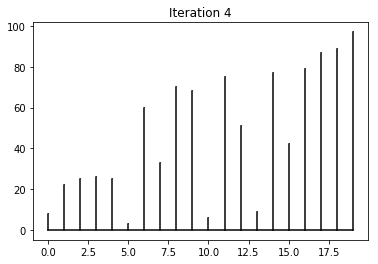

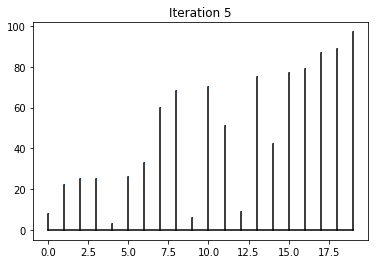

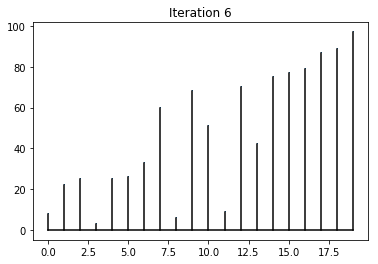

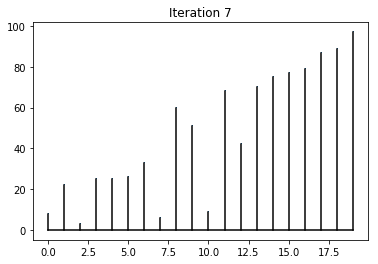

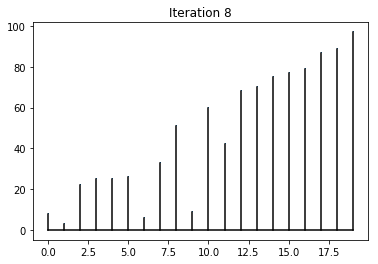

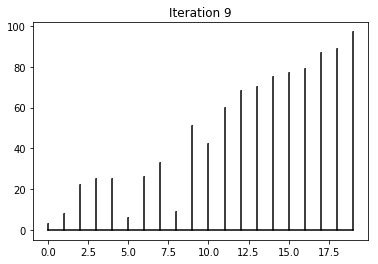

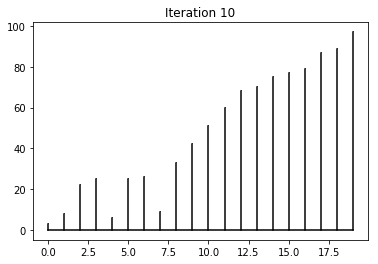

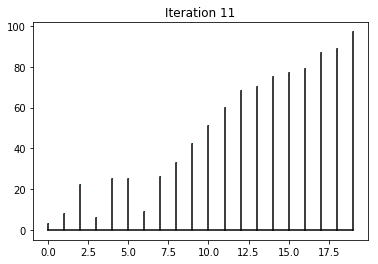

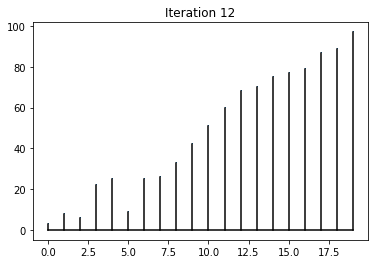

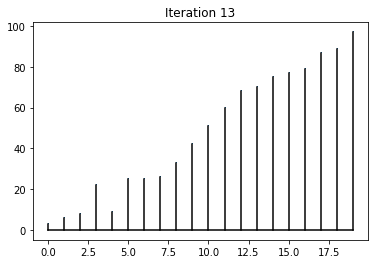

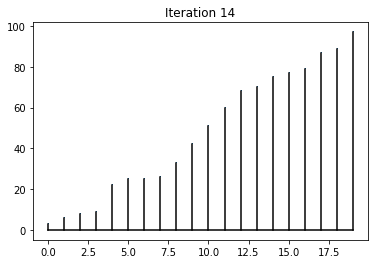

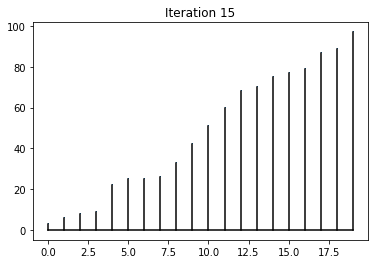

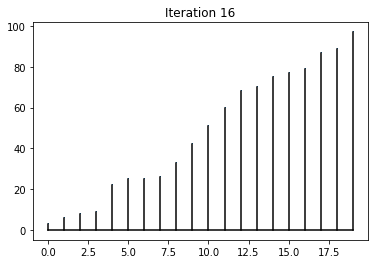

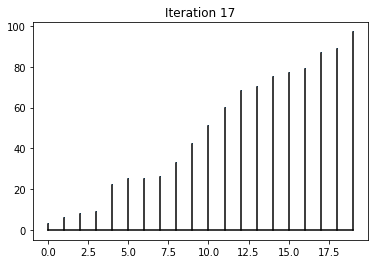

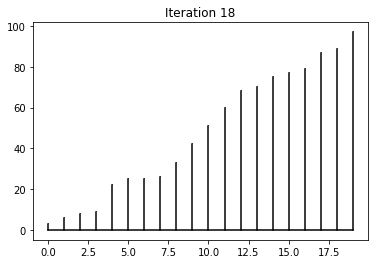

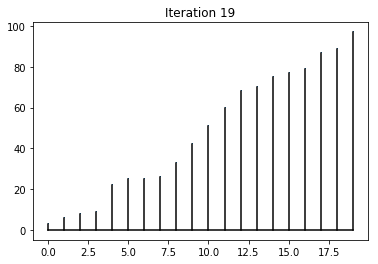

In [12]:
T = np.random.randint(0,100,20)
N = len(T)
it = 0

affiche(T,it)

for k in range(N,1,-1):
    for i in range(0,k-1):
        if T[i] > T[i+1]:
            T[i],T[i+1] = T[i+1],T[i]   # swap        
    it += 1
    affiche(T,it)